In [82]:

import pandas as pd
train = pd.read_csv('train.csv')  
test = pd.read_csv('test.csv')

#print(train.info())
#print(test.info())
#print(train.head())
#print(train.shape)
print(train.describe())

                 ID          Year         Month           Day      latitude  \
count  84960.000000  84960.000000  84960.000000  84960.000000  84960.000000   
mean   42480.500000      4.610876      6.666667     15.735876     24.003334   
std    24525.983772      2.239331      3.402793      8.802867      0.798622   
min        1.000000      1.000000      1.000000      1.000000     22.880000   
25%    21240.750000      3.000000      4.000000      8.000000     23.680003   
50%    42480.500000      5.000000      7.000000     16.000000     23.780002   
75%    63720.250000      7.000000     10.000000     23.000000     24.280002   
max    84960.000000      8.000000     12.000000     31.000000     26.580005   

          longitude  Avg_Temperature  Avg_Feels_Like_Temperature  \
count  84960.000000     84960.000000                84960.000000   
mean     -37.266665       135.600751                  139.735375   
std        0.488873       133.650417                  133.937168   
min      -37.729

In [83]:
print("\nMissing Values:")
print(train.isnull().sum())
print("\nUnique Values:")
print(train[["Year", "Month", "Day"]].head())
print(train.dtypes)
# Find invalid rows where the day does not match the month
invalid_dates = train[(train["Day"] > 31) | (train["Month"] > 12) | (train["Day"] == 0) | (train["Month"] == 0)]
print(invalid_dates)
import calendar

def is_valid_date(row):
    year, month, day = row["Year"], row["Month"], row["Day"]
    if month < 1 or month > 12:
        return False  # Invalid month
    max_days = calendar.monthrange(year, month)[1]  # Get max days in month
    return 1 <= day <= max_days  # Check if day is valid

# Find all problematic rows
invalid_dates = train[~train.apply(is_valid_date, axis=1)]

# Print them
print(invalid_dates)
train = train[train.apply(is_valid_date, axis=1)]




Missing Values:
ID                              0
Year                            0
Month                           0
Day                             0
kingdom                         0
latitude                        0
longitude                       0
Avg_Temperature                 0
Avg_Feels_Like_Temperature      0
Temperature_Range               0
Feels_Like_Temperature_Range    0
Radiation                       0
Rain_Amount                     0
Rain_Duration                   0
Wind_Speed                      0
Wind_Direction                  0
Evapotranspiration              0
dtype: int64

Unique Values:
   Year  Month  Day
0     1      4    1
1     1      4    1
2     1      4    1
3     1      4    1
4     1      4    1
ID                                int64
Year                              int64
Month                             int64
Day                               int64
kingdom                          object
latitude                        float64
longitude       

In [85]:
# Fix 1: Add proper line breaks and remove duplicate code
# Fix 2: Use proper year conversion (4000 offset seems unusual)
# Fix 3: Add proper column separation

# Convert years (if needed - 4000 offset seems suspicious)
train["Year"] += 8000
print("Train years:", train["Year"].unique())

test["Year"] += 8000
print("Test years:", test["Year"].unique())

# Create datetime objects
import pandas as pd

# Fix 4: Use proper datetime construction
train["Date"] = pd.to_datetime(train[["Year", "Month", "Day"]])
test["Date"] = pd.to_datetime(test[["Year", "Month", "Day"]])

# Fix 5: Add proper line break and sort
train = train.sort_values("Date")


Train years: [2001 2002 2003 2004 2005 2006 2007 2008]
Test years: [2009]


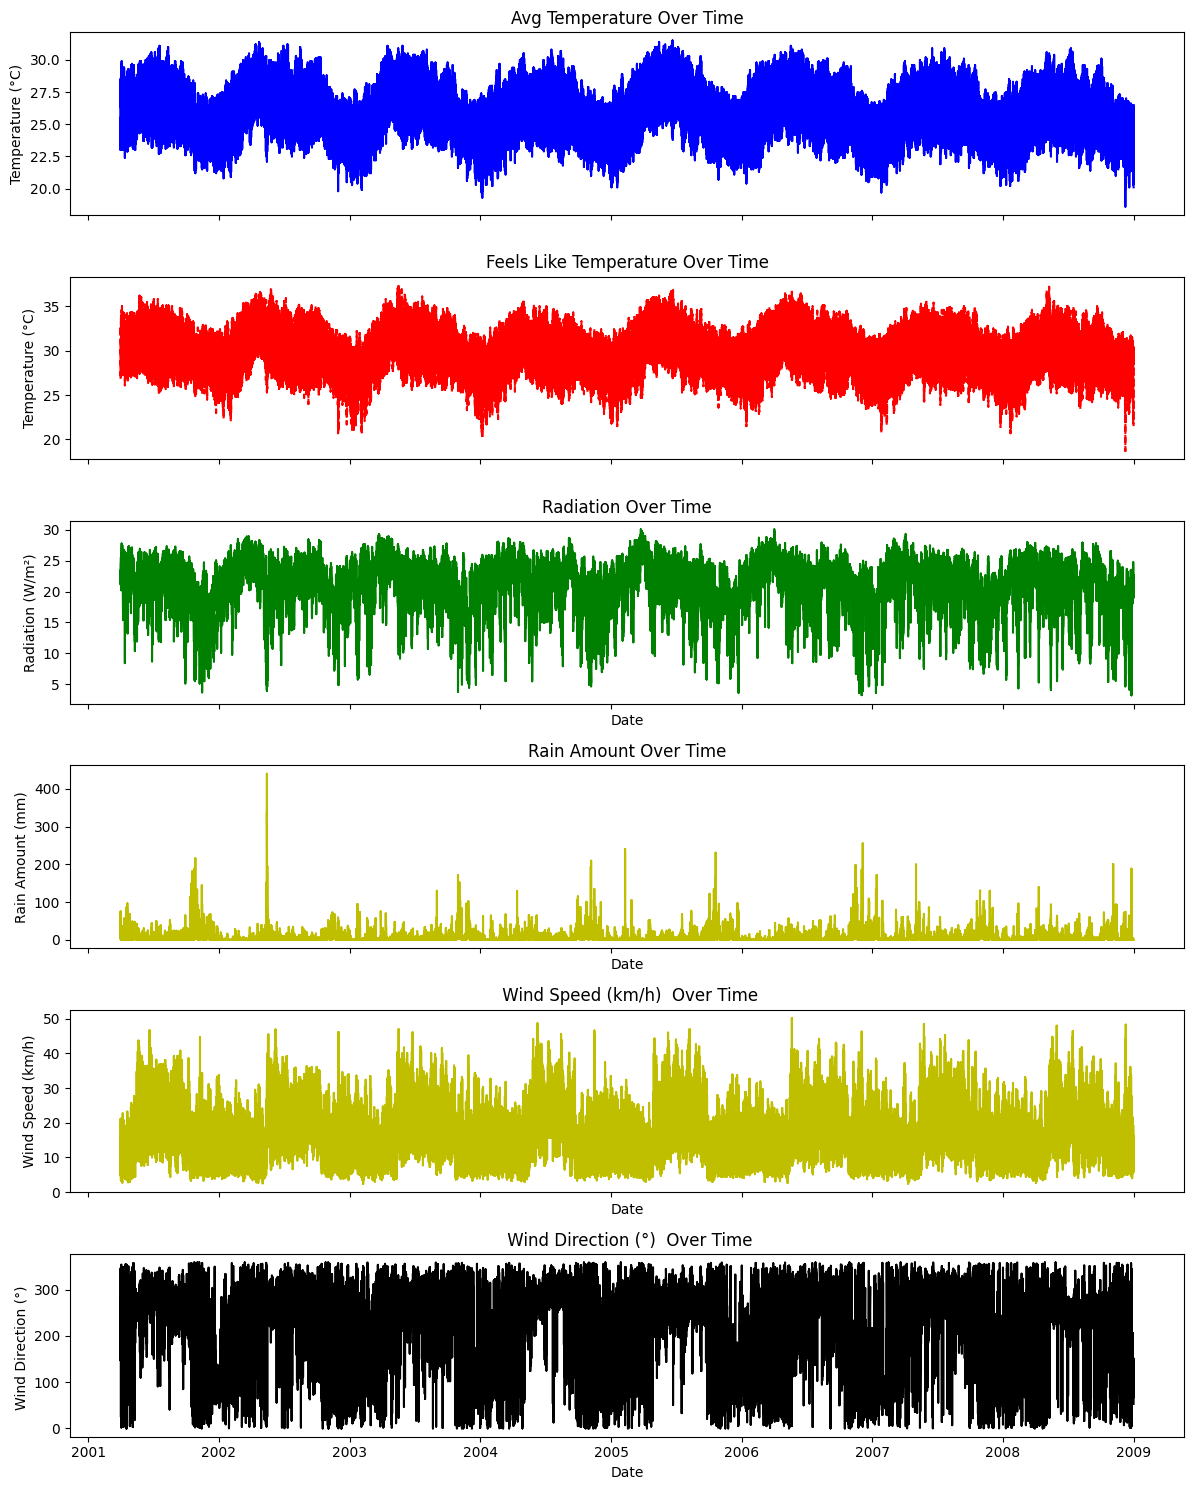

C:\Users\ASUS\AppData\Local\Temp\ipykernel_19412\3600836847.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=train["Month"], y=train["Avg_Temperature"], palette="coolwarm")


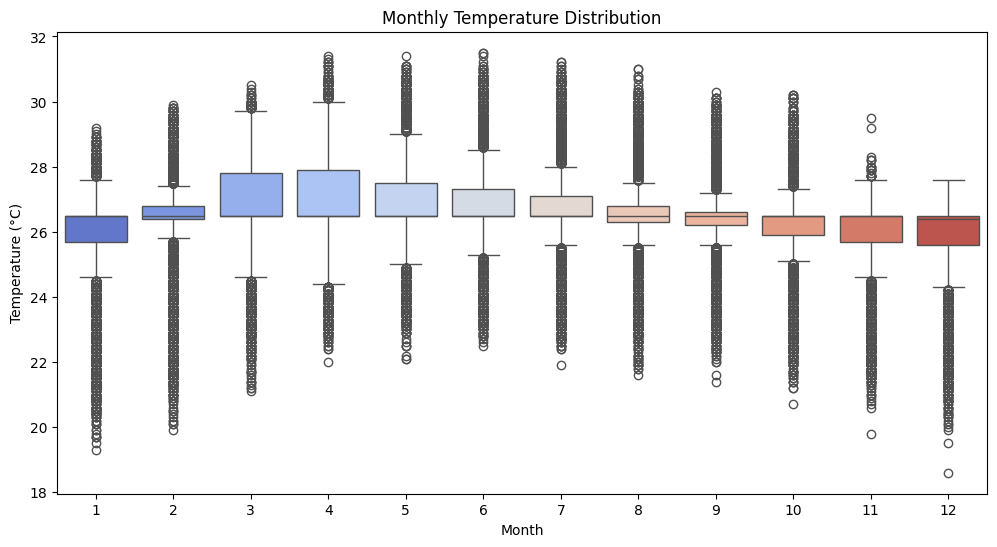

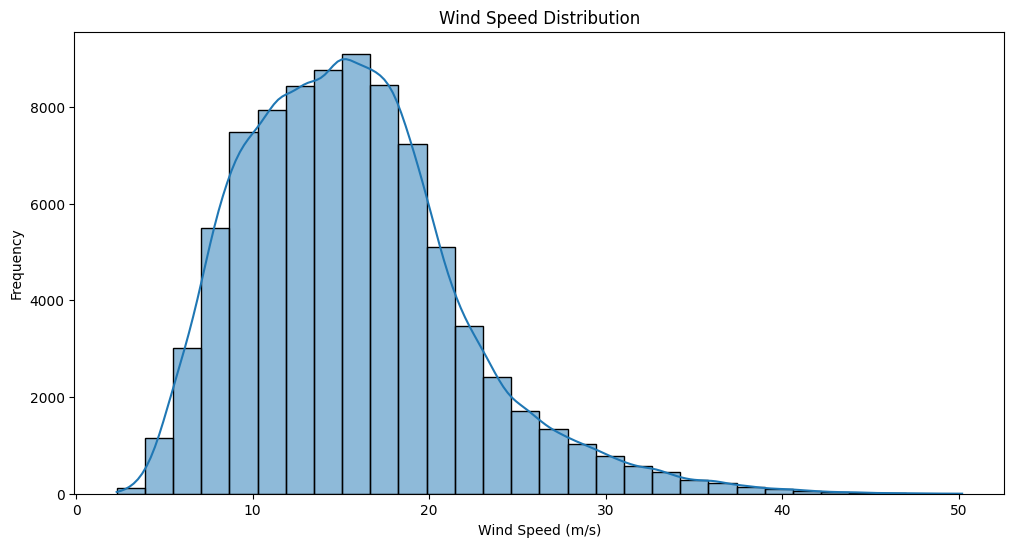

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Replace extreme values with mean values
valid_avg_temp = train[train["Avg_Temperature"] < 100]["Avg_Temperature"].mean()
valid_avg_feels_like_temp = train[train["Avg_Feels_Like_Temperature"] < 100]["Avg_Feels_Like_Temperature"].mean()

train.loc[train["Avg_Temperature"] >= 100, "Avg_Temperature"] = valid_avg_temp
train.loc[train["Avg_Feels_Like_Temperature"] >= 100, "Avg_Feels_Like_Temperature"] = valid_avg_feels_like_temp

# Create a figure with three subplots (for Temperature, Feels Like, and Radiation)
fig, axes = plt.subplots(6, 1, figsize=(12, 15), sharex=True)

# Plot Avg Temperature
axes[0].plot(train["Date"], train["Avg_Temperature"], color='b')
axes[0].set_ylabel("Temperature (°C)")
axes[0].set_title("Avg Temperature Over Time")

# Plot Feels Like Temperature
axes[1].plot(train["Date"], train["Avg_Feels_Like_Temperature"], color='r', linestyle='dashed')
axes[1].set_ylabel("Temperature (°C)")
axes[1].set_title("Feels Like Temperature Over Time")

# **Plot Radiation Over Time**
axes[2].plot(train["Date"], train["Radiation"], color='g')
axes[2].set_ylabel("Radiation (W/m²)")
axes[2].set_xlabel("Date")
axes[2].set_title("Radiation Over Time")

# **Plot Rain Amount Over Time**
axes[3].plot(train["Date"], train["Rain_Amount"], color='y')
axes[3].set_ylabel("Rain Amount (mm)")
axes[3].set_xlabel("Date")
axes[3].set_title("Rain Amount Over Time")

axes[4].plot(train["Date"], train["Wind_Speed"], color='y')
axes[4].set_ylabel(" Wind Speed (km/h) ")
axes[4].set_xlabel("Date")
axes[4].set_title(" Wind Speed (km/h)  Over Time")

axes[5].plot(train["Date"], train["Wind_Direction"], color='black')
axes[5].set_ylabel("Wind Direction (°) ")
axes[5].set_xlabel("Date")
axes[5].set_title(" Wind Direction (°)  Over Time")
# Adjust layout and show plot
plt.tight_layout()
plt.show()

# Boxplot for Monthly Temperature Distribution
plt.figure(figsize=(12, 6))
sns.boxplot(x=train["Month"], y=train["Avg_Temperature"], palette="coolwarm")
plt.xlabel("Month")
plt.ylabel("Temperature (°C)")
plt.title("Monthly Temperature Distribution")
plt.show()

# Histogram for Wind Speed Distribution
plt.figure(figsize=(12, 6))
sns.histplot(train["Wind_Speed"], bins=30, kde=True)
plt.xlabel("Wind Speed (m/s)")
plt.ylabel("Frequency")
plt.title("Wind Speed Distribution")
plt.show()



In [45]:

#train.describe().transpose()
#train.info()

print("Train columns:", train.columns.tolist())
print("Test columns:", test.columns.tolist())

Train columns: ['ID', 'Year', 'Day', 'latitude', 'longitude', 'Avg_Temperature', 'Avg_Feels_Like_Temperature', 'Temperature_Range', 'Feels_Like_Temperature_Range', 'Radiation', 'Rain_Amount', 'Rain_Duration', 'Wind_Speed', 'Wind_Direction', 'Evapotranspiration', 'Wind_sin', 'Wind_cos', 'Date', 'DayOfYear', 'Year sin', 'Year cos', 'DaysSinceStart', 'kingdom_Arcadia', 'kingdom_Atlantis', 'kingdom_Avalon', 'kingdom_Camelot', 'kingdom_Dorne', 'kingdom_Eden', 'kingdom_El Dorado', 'kingdom_Elysium', 'kingdom_Emerald City', 'kingdom_Helios', 'kingdom_Krypton', 'kingdom_Metropolis', 'kingdom_Midgar', 'kingdom_Midgard', 'kingdom_Mordor', 'kingdom_Neo-City', 'kingdom_Neo-Tokyo', 'kingdom_Nirvana', 'kingdom_Olympus', 'kingdom_Pandora', 'kingdom_Rapture', 'kingdom_Rivendell', 'kingdom_Serenity', 'kingdom_Shangri-La', 'kingdom_Solara', 'kingdom_Solstice', 'kingdom_Sunspear', 'kingdom_Utopia', 'kingdom_Valyria', 'kingdom_Winterfell', 'Month_1', 'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6', 

In [86]:
import numpy as np
import pandas as pd
import sys

sys.path.append(r'C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages')

from scipy.ndimage import gaussian_filter1d
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor


# Add path for package (if required)
sys.path.append(r'C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages')

# Define target variables
target_vars = ["Avg_Temperature", "Radiation", "Rain_Amount", "Wind_Speed", "Wind_sin", "Wind_cos"]

# Convert Date to datetime
train['Date'] = pd.to_datetime(train['Date'])
test['Date'] = pd.to_datetime(test['Date'])

# Convert Wind_Direction to sine/cosine (circular encoding)
train['Wind_sin'] = np.sin(np.radians(train['Wind_Direction']))
train['Wind_cos'] = np.cos(np.radians(train['Wind_Direction']))


# Extract cyclical features (Day of Year) and apply smoothing
yearly_cycle = 365
for df in [train, test]:
    df['DayOfYear'] = df['Date'].dt.dayofyear
    df['Year sin'] = np.sin(2 * np.pi * df['DayOfYear'] / yearly_cycle)
    df['Year cos'] = np.cos(2 * np.pi * df['DayOfYear'] / yearly_cycle)
    
    # Apply Gaussian smoothing to cyclical features
    df["Year sin smoothed"] = gaussian_filter1d(df["Year sin"], sigma=2)
    df["Year cos smoothed"] = gaussian_filter1d(df["Year cos"], sigma=2)

# Linear time trend (days since first observation)
train_start_date = train['Date'].min()
train['DaysSinceStart'] = (train['Date'] - train_start_date).dt.days
test['DaysSinceStart'] = (test['Date'] - train_start_date).dt.days

# One-hot encoding categorical features
train = pd.get_dummies(train, columns=['kingdom'])
test = pd.get_dummies(test, columns=['kingdom'])
# Drop smoothed cyclical features
train = train.drop(columns=["Year sin smoothed", "Year cos smoothed"])
test = test.drop(columns=["Year sin smoothed", "Year cos smoothed"])
# Align test data columns with training features
missing_cols = set(train.columns) - set(test.columns)
for col in missing_cols:
    test[col] = 0
test = test[train.columns]

# Apply smoothing techniques (Moving Average & EWMA)
for col in ["Avg_Temperature", "Radiation", "Rain_Amount", "Wind_Speed"]:
    train[col + "_smoothed"] = train[col].rolling(window=7, min_periods=1).mean()
    test[col + "_smoothed"] = test[col].rolling(window=7, min_periods=1).mean()
    
    train[col + "_ewma"] = train[col].ewm(span=7, adjust=False).mean()
    test[col + "_ewma"] = test[col].ewm(span=7, adjust=False).mean()

# Remove outliers by clipping extreme values
for col in ["Avg_Temperature", "Radiation", "Rain_Amount", "Wind_Speed"]:
    train[col] = train[col].clip(lower=train[col].quantile(0.01), upper=train[col].quantile(0.99))
    test[col] = test[col].clip(lower=test[col].quantile(0.01), upper=test[col].quantile(0.99))

# Prepare feature set and target variables
X_train = train.drop(columns=["ID", "Date", "Wind_Direction"] + target_vars)
y_train = train[target_vars]
# Train a classifier for rain/no rain
from sklearn.ensemble import RandomForestClassifier
rain_classifier = RandomForestClassifier().fit(X_train, (y_train["Rain_Amount"] > 0).astype(int))

# Train a regressor only on rainy days
rain_regressor = LGBMRegressor().fit(X_train[y_train["Rain_Amount"] > 0], y_train[y_train["Rain_Amount"] > 0]["Rain_Amount"])


X_test = test.drop(columns=["ID", "Date"])
missing_cols = set(X_train.columns) - set(X_test.columns)
extra_cols = set(X_test.columns) - set(X_train.columns)

# Add missing columns to test data
for col in missing_cols:
    X_test[col] = 0

# Remove extra columns not in training
X_test = X_test[X_train.columns]

# Model Training & Prediction
model = MultiOutputRegressor(
    LGBMRegressor(
        n_estimators=1000,  # Increase for slower learning
        learning_rate=0.02, # Reduce learning rate
        max_depth=8,        # Allow deeper trees
        num_leaves=32,      # Increase complexity
        reg_alpha=0.1,      # Add L1 regularization
        reg_lambda=0.1,     # Add L2 regularization
        min_child_samples=20, 
        random_state=42,
        n_jobs=-1
    )
)
model.fit(X_train, y_train)

# Predict target variables
y_pred = model.predict(X_test)
y_pred_df = pd.DataFrame(y_pred, columns=target_vars)

# Convert Wind_sin/Wind_cos back to degrees
wind_dir_rad = np.arctan2(y_pred_df['Wind_sin'], y_pred_df['Wind_cos'])
wind_dir_deg = (np.degrees(wind_dir_rad) % 360).round(1)

# Compile final predictions
final_predictions = pd.DataFrame({
    'ID': test['ID'],
    'Avg_Temperature': y_pred_df['Avg_Temperature'],
    'Radiation': y_pred_df['Radiation'],
    'Rain_Amount': y_pred_df['Rain_Amount'].round(1),
    'Wind_Speed': y_pred_df['Wind_Speed'].round(1),
    'Wind_Direction': wind_dir_deg
})

# Save predictions to CSV
final_predictions.to_csv('predictions9.csv', index=False)

print("Preprocessing, model training, and predictions completed successfully!")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001748 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4152
[LightGBM] [Info] Number of data points in the train set: 70046, number of used features: 52
[LightGBM] [Info] Start training from score 8.974751
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001210 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4191
[LightGBM] [Info] Number of data points in the train set: 84900, number of used features: 52
[LightGBM] [Info] Start training from score 135.602567
[LightGBM] [Warning] No fu

In [87]:

from sklearn.metrics import mean_absolute_error, mean_squared_error

# Time-based train-validation split (last 30 days as validation)
train_end = train['Date'].max() - pd.Timedelta(days=30)
X_train = train[train['Date'] <= train_end].drop(columns=["ID", "Date", "Wind_Direction"] + target_vars)
y_train = train[train['Date'] <= train_end][target_vars]

X_val = train[train['Date'] > train_end].drop(columns=["ID", "Date", "Wind_Direction"] + target_vars)
y_val = train[train['Date'] > train_end][target_vars]

# Train model
model = MultiOutputRegressor(
    LGBMRegressor(n_estimators=500, learning_rate=0.05, max_depth=6, random_state=42, n_jobs=-1)
)
model.fit(X_train, y_train)

# Validate
y_val_pred = model.predict(X_val)

# Calculate MAE/RMSE per target
mae = mean_absolute_error(y_val, y_val_pred, multioutput='raw_values')
rmse = np.sqrt(mean_squared_error(y_val, y_val_pred, multioutput='raw_values'))

for i, col in enumerate(target_vars):
    print(f"{col}: MAE = {mae[i]:.2f}, RMSE = {rmse[i]:.2f}")

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010521 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4190
[LightGBM] [Info] Number of data points in the train set: 84000, number of used features: 52
[LightGBM] [Info] Start training from score 135.617154
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positiv

KeyError: 'Date'

In [18]:
import sys
print(sys.path)


['c:\\Program Files\\Python313\\python313.zip', 'c:\\Program Files\\Python313\\DLLs', 'c:\\Program Files\\Python313\\Lib', 'c:\\Program Files\\Python313', '', 'C:\\Users\\ASUS\\AppData\\Roaming\\Python\\Python313\\site-packages', 'C:\\Users\\ASUS\\AppData\\Roaming\\Python\\Python313\\site-packages\\win32', 'C:\\Users\\ASUS\\AppData\\Roaming\\Python\\Python313\\site-packages\\win32\\lib', 'C:\\Users\\ASUS\\AppData\\Roaming\\Python\\Python313\\site-packages\\Pythonwin', 'c:\\Program Files\\Python313\\Lib\\site-packages']
